<a href="https://colab.research.google.com/github/Jeesoo-Jhun/mood-detection-music-recommendation/blob/main/modeling4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In this section, we will be using both data generators and data augmentation to train a deep learning model for human emotion detection using the FER-2013 dataset. Due to the size and complexity of the dataset, it would be impractical to load all of the images into memory at once. Therefore, we will be using data generators to generate batches of images on-the-fly during training, which will allow us to efficiently train our model on the entire dataset.

In addition, we will be applying various data augmentation techniques to the training images, such as rotation, shifting, and flipping. This will help to increase the size and diversity of our training set, which can improve the performance of our deep learning model. By introducing variability into the training process, data augmentation can also help to prevent overfitting, which occurs when the model becomes too closely tailored to the training set and performs poorly on new, unseen data.

In [14]:
pip install numpy pandas matplotlib seaborn scikit-learn scipy tensorflow keras pillow ipython jupyter notebook


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 53.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 6.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
img_shape = 48
batch_size = 64
train_data_path = '/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/archive/train'
test_data_path = '/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/archive/test'

In [6]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)


test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Modeling**

### CNN Model

To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.

We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def Create_CNN_Model():
    model = Sequential()

    # CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN2
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))

    return model


In [8]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     6,554,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,837,895 (29.90 MB)

 Trainable params: 7,832,519 (29.88 MB)

 Non-trainable params: 5,376 (21.00 KB)

**Specifying Callbacks**

In [9]:
# Install and import TensorFlow

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True
)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1
)

# Combine callbacks
callbacks = [Early_Stopping, Reducing_LR, Checkpoint]

# Calculate steps per epoch
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size


In [ ]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6443s 14s/step - accuracy: 0.1814 - loss: 2.2278 - val_accuracy: 0.2529 - val_loss: 1.8269 - learning_rate: 0.0010
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 311us/step - accuracy: 0.4375 - loss: 1.6486 - val_accuracy: 0.0000e+00 - val_loss: 2.7447 - learning_rate: 0.0010
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1059s 2s/step - accuracy: 0.2628 - loss: 1.8158 - val_accuracy: 0.3327 - val_loss: 1.6542 - learning_rate: 0.0010
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2969 - loss: 1.8078 - val_accuracy: 1.0000 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.3271 - loss: 1.6837 - val_accuracy: 0.4076 - val_loss: 1.5198 - learning_rate: 0.0010
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 221us/step - accuracy: 0.3594 - loss: 1.7898 - val_accuracy: 1.0000 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1089s 2s/step - accuracy: 0.3910 - loss: 1.5674 - val_accuracy: 0.4494 - val_loss: 1.4152 - learning_rate: 0.0010
Epoch 8/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 12:47 2s/step - accuracy: 0.4844 - loss: 1.4231
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 208us/step - accuracy: 0.4844 - loss: 1.4231 -

At the 19th, early stopping applied.

## **Fine-Tuning CNN (More epochs)**

In [12]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 10),
                ModelCheckpoint(
                    filepath='model.weights.best.keras',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [14]:
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

history = CNN_Model.fit(x=train_data,
                 validation_data=test_data,
                 epochs=100,
                 callbacks=[checkpointer],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/100


/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.1849 - loss: 2.2132
Epoch 1: val_accuracy improved from -inf to 0.24805, saving model to model.weights.best.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 146s 319ms/step - accuracy: 0.1850 - loss: 2.2128 - val_accuracy: 0.2480 - val_loss: 1.8139
Epoch 2/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:31 338ms/step - accuracy: 0.1875 - loss: 1.8316

/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.24805
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1875 - loss: 1.8316 - val_accuracy: 0.2480 - val_loss: 1.8132
Epoch 3/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.2686 - loss: 1.8028
Epoch 3: val_accuracy improved from 0.24805 to 0.30845, saving model to model.weights.best.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 162s 361ms/step - accuracy: 0.2686 - loss: 1.8028 - val_accuracy: 0.3085 - val_loss: 1.7013
Epoch 4/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:38 354ms/step - accuracy: 0.3438 - loss: 1.6683
Epoch 4: val_accuracy did not improve from 0.30845
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3438 - loss: 1.6683 - val_accuracy: 0.3080 - val_loss: 1.7023
Epoch 5/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3286 - loss: 1.6823
Epoch 5: val_accuracy improved from 0.30845 to 0.39579, saving model to model.weights.best.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 149s 332ms/step - accuracy: 0.3286 - loss: 1.682

## **Evaluating CNN Model**

In [15]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5798 - loss: 1.0890
    Test Loss: 0.95545
Test Accuracy: 64.63%


In [16]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

  #plt.tight_layout()

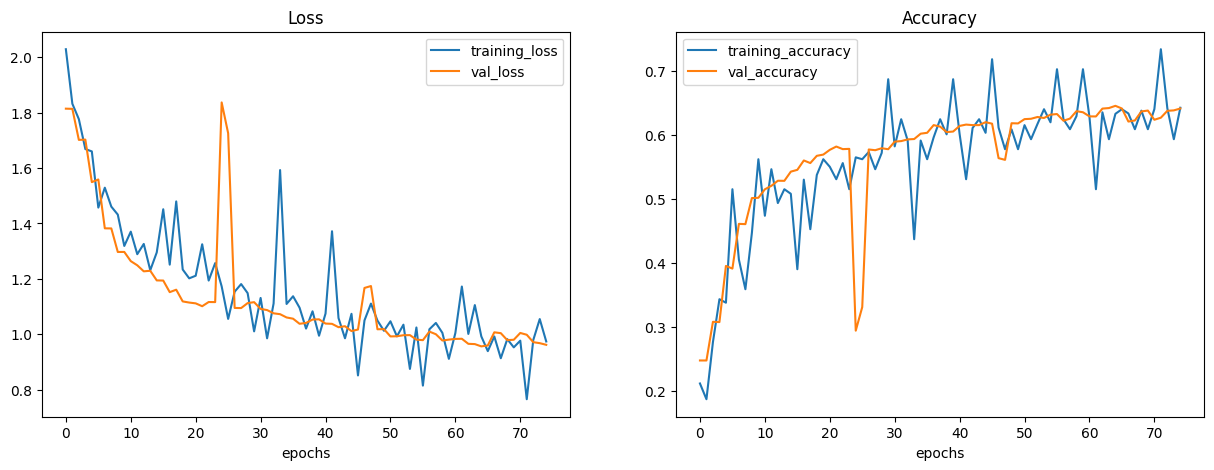

In [18]:
import matplotlib.pyplot as plt # Import the pyplot module and assign it the alias 'plt'

plot_curves(history) # Call the function to plot the curves

The loss graph shows a consistent decrease in both training and validation loss over epochs, indicating improved model performance, though with occasional fluctuations. The accuracy graph demonstrates a steady increase in both training and validation accuracy, suggesting that the model is learning effectively without significant overfitting.

In [19]:
import numpy as np
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step


In [20]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

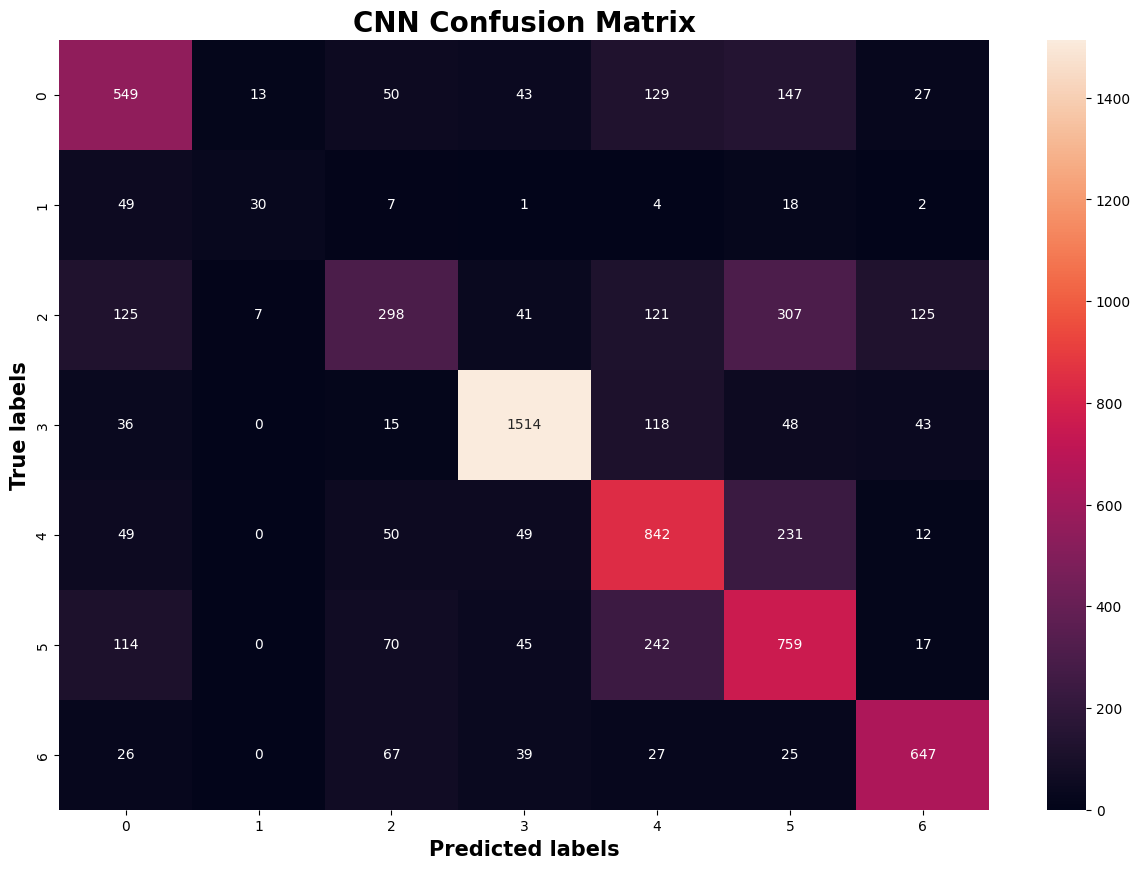

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

The confusion matrix shows the performance of the CNN model in classifying different labels, with high accuracy for some classes (e.g., class 3 and class 4 have strong diagonal values). However, there is noticeable misclassification in certain classes, particularly where predictions are spread across multiple incorrect labels, indicating areas for potential model improvement.

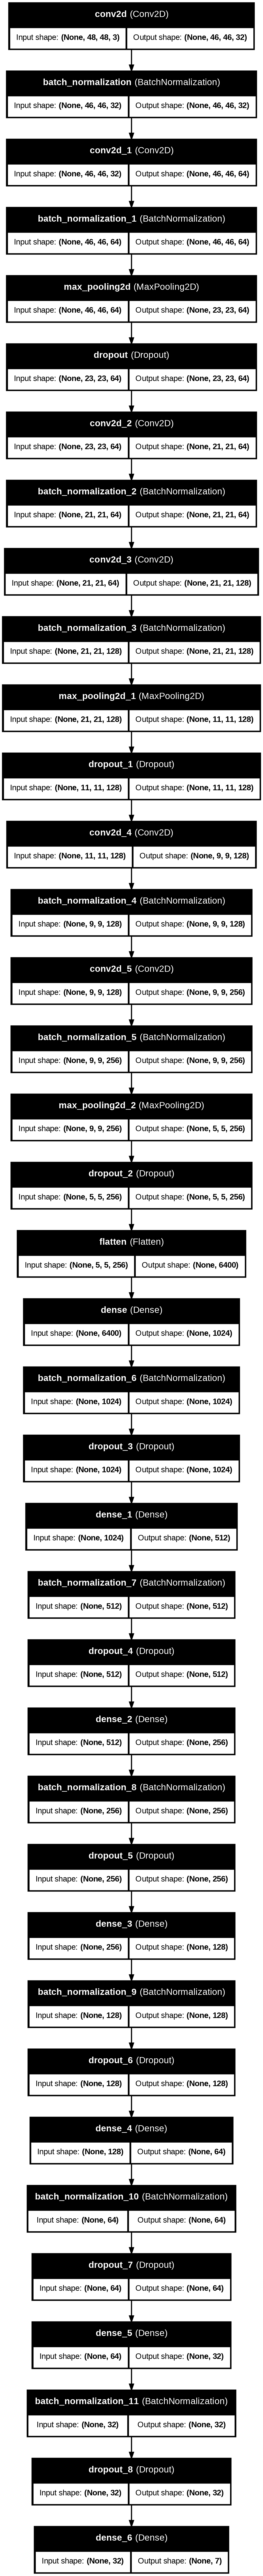

In [26]:
from tensorflow.keras.utils import plot_model # Import the plot_model function

plot_model(CNN_Model, to_file='model.png', show_shapes=True, show_layer_names=True)  # Use CNN_Model instead of 'model'

## **Evaluating fine-tuned CNN Model**

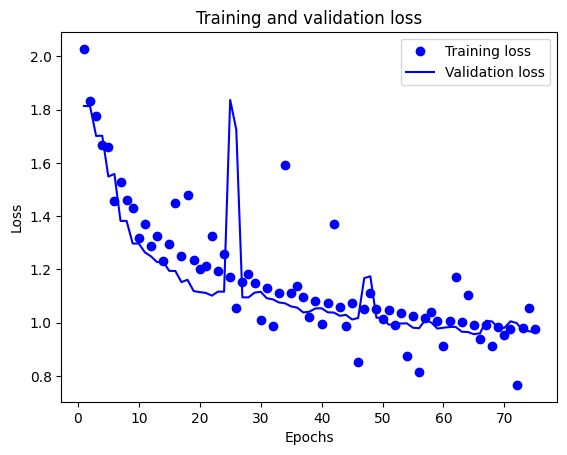

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo' = blue dots
plt.plot(epochs, val_loss, 'b', label='Validation loss')   # 'b' = blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


This graph displays the training and validation loss over epochs, showing a general decreasing trend, which indicates that the model is learning effectively. However, there are occasional spikes and fluctuations in the validation loss, suggesting potential overfitting or instability in the training process at certain points.

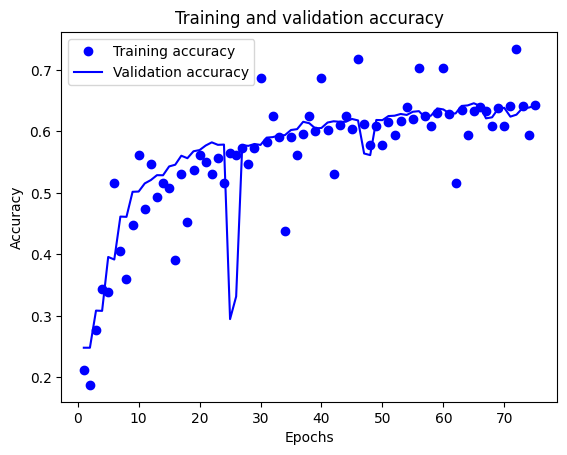

In [23]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # Redefine epochs to match the length of train_acc/val_acc
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph shows that both training and validation accuracy improve steadily over epochs, indicating that the model is learning. However, occasional dips in validation accuracy suggest overfitting or inconsistent generalization. To improve, consider techniques like dropout, early stopping, or fine-tuning learning rates to stabilize and enhance validation performance.

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step


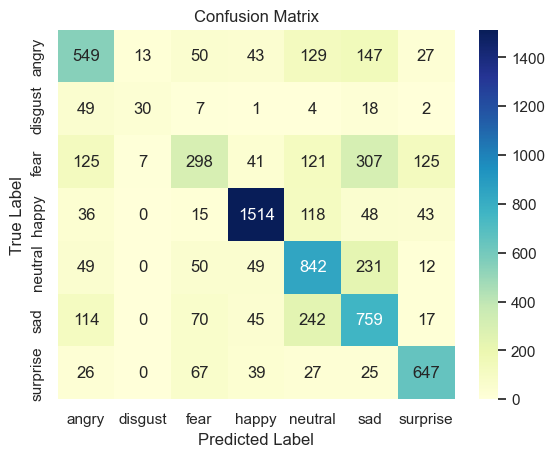

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the test set
validation_labels = test_data.classes
validation_pred_probs = CNN_Model.predict(test_data)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_data.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **ResNet50V2 Model**

Why choosing ResNet50V2 Model?

ResNet50V2 is chosen due to its demonstrated effectiveness in image classification tasks.
Its residual learning architecture helps mitigate the vanishing gradient problem, enabling training of deeper networks and potentially capturing more complex features from the facial images, which is beneficial for emotion recognition.  
Furthermore, pre-trained weights can be used as a starting point, allowing faster convergence and better performance with the available data.  Its relatively high accuracy on other image datasets suggests a strong foundation for this application.  While a custom CNN was explored as a baseline, the architectural advantages of ResNet50V2 make it a preferred choice for this task.

In [26]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64

In [27]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Fine-Tuning ResNet50V2**

In [28]:
import tensorflow as tf
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

ResNet50V2.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [29]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [30]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [31]:
from tensorflow.keras.models import Sequential # Add import for Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Flatten, Dense

ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

**Specifying Callbacks**

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_path = "ResNet50V2_Model_Checkpoint.weights.h5"  # Changed extension to .weights.h5

# Create Callback Checkpoint to save weights after each epoch
Checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Save the model in .keras format
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,  # This is set to True, so the filepath must end with .weights.h5
    verbose=1
)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1
)

# Callbacks list
callbacks = [Checkpoint, Early_Stopping, Reducing_LR]

# Steps per epoch and validation steps
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [33]:
# Check if there's a previously saved checkpoint
initial_epoch = 0  # Default starting epoch
try:
    # Load weights if a saved checkpoint exists
    ResNet50V2_Model.load_weights(checkpoint_path)
    print("Checkpoint loaded. Resuming training...")
    initial_epoch = int(checkpoint_path.split('_')[-1].split('.')[0])  # Extract saved epoch if needed
except Exception as e:
    print("No checkpoint found. Starting from scratch.")

# Train the model
ResNet50V2_history = ResNet50V2_Model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,  # Total epochs
    initial_epoch=initial_epoch,  # Start from the saved epoch
    batch_size=batch_size,
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

print("Training complete!")

No checkpoint found. Starting from scratch.


/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4108 - loss: 1.7840
Epoch 1: val_accuracy improved from -inf to 0.57799, saving model to ResNet50V2_Model_Checkpoint.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1506s 3s/step - accuracy: 0.4109 - loss: 1.7833 - val_accuracy: 0.5780 - val_loss: 1.2305 - learning_rate: 0.0010
Epoch 2/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 32:17 4s/step - accuracy: 0.5000 - loss: 1.3443

/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.57799
448/448 ━━━━━━━━━━━━━━━━━━━━ 182s 397ms/step - accuracy: 0.5000 - loss: 1.3443 - val_accuracy: 0.5753 - val_loss: 1.2277 - learning_rate: 0.0010
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5681 - loss: 1.1874
Epoch 3: val_accuracy did not improve from 0.57799
448/448 ━━━━━━━━━━━━━━━━━━━━ 1429s 3s/step - accuracy: 0.5681 - loss: 1.1874 - val_accuracy: 0.5660 - val_loss: 1.6718 - learning_rate: 0.0010
Epoch 4/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 20:39 3s/step - accuracy: 0.5312 - loss: 1.2416
Epoch 4: val_accuracy did not improve from 0.57799

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 382ms/step - accuracy: 0.5312 - loss: 1.2416 - val_accuracy: 0.5692 - val_loss: 1.5529 - learning_rate: 0.0010
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6064 - loss: 1.0938
Epoch 5: val_accuracy improved from 0.57799 to 0.63114, saving model to ResNe

## **Evaluating ResNet50V2**

In [34]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6224 - loss: 1.0171
    Test Loss: 0.91359
Test Accuracy: 66.91%


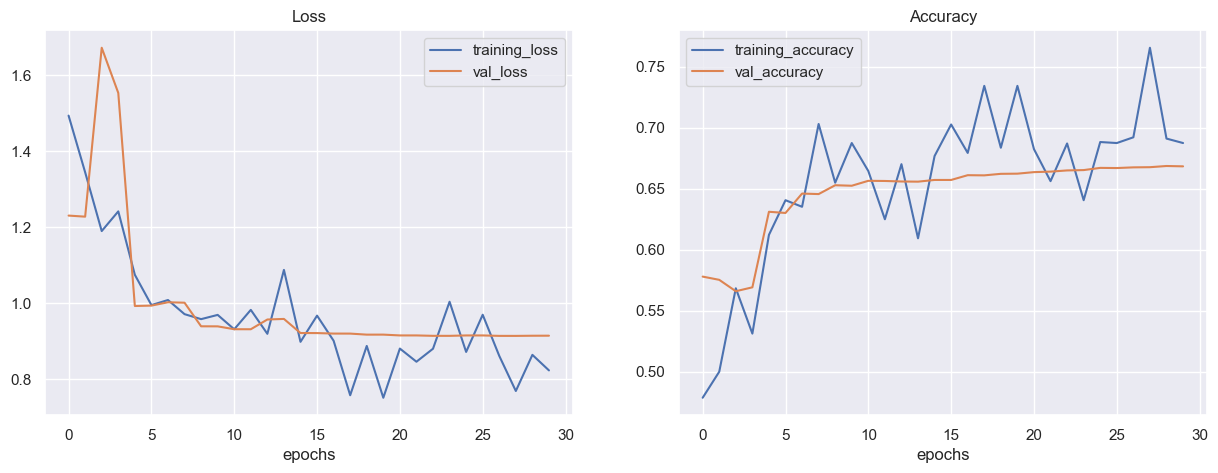

In [35]:
plot_curves(ResNet50V2_history)

The graphs indicate that the training loss decreases steadily while validation loss stabilizes early, suggesting no significant overfitting. Similarly, training accuracy improves consistently, and validation accuracy plateaus around 60-70%, indicating the model performs reasonably well but could benefit from further optimization or regularization for better generalization.

In [36]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

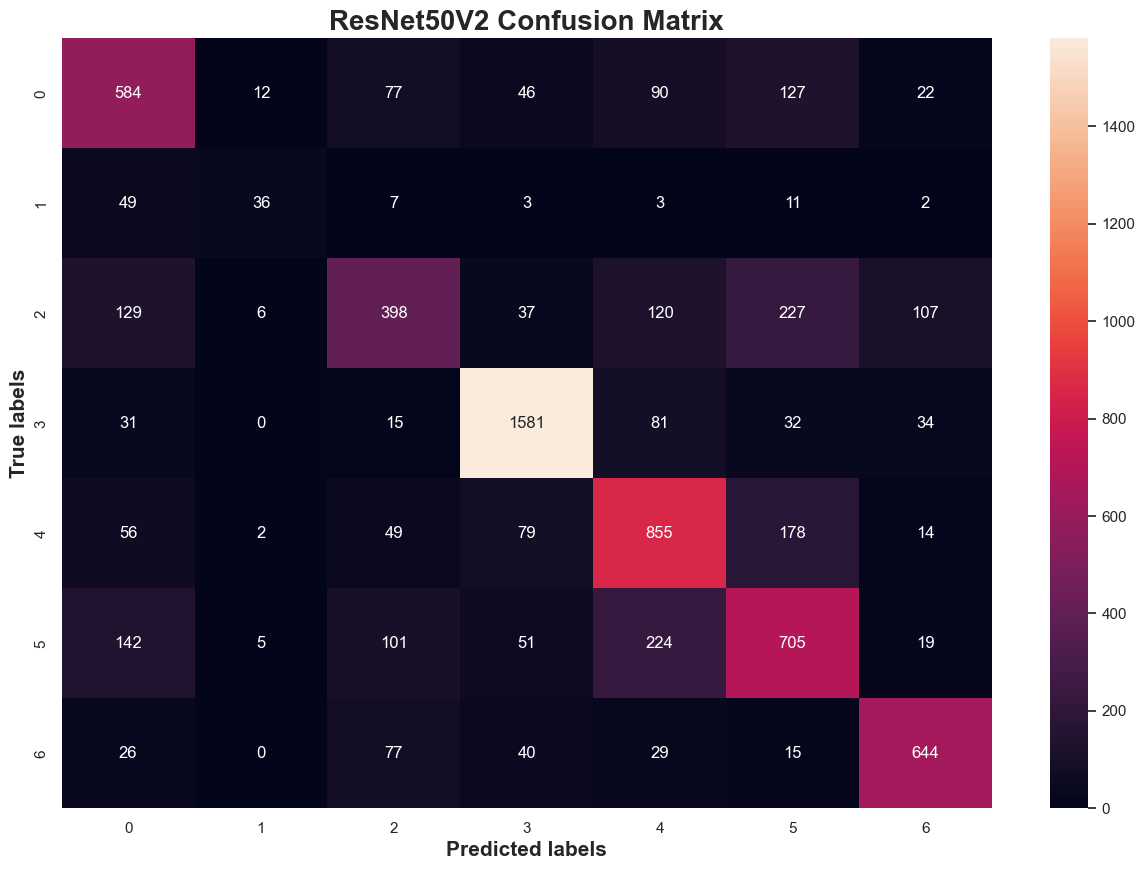

In [37]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

The confusion matrix for ResNet50V2 shows strong performance in classifying certain labels (e.g., label 3 with 1581 correct predictions), but there are notable misclassifications in other classes, such as label 2 being confused with labels 0 and 4. This suggests that while the model performs well overall, there is room for improvement in handling specific class distinctions.

## **Visualizing Predictions**

In [38]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [39]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


**CNN Predictions**

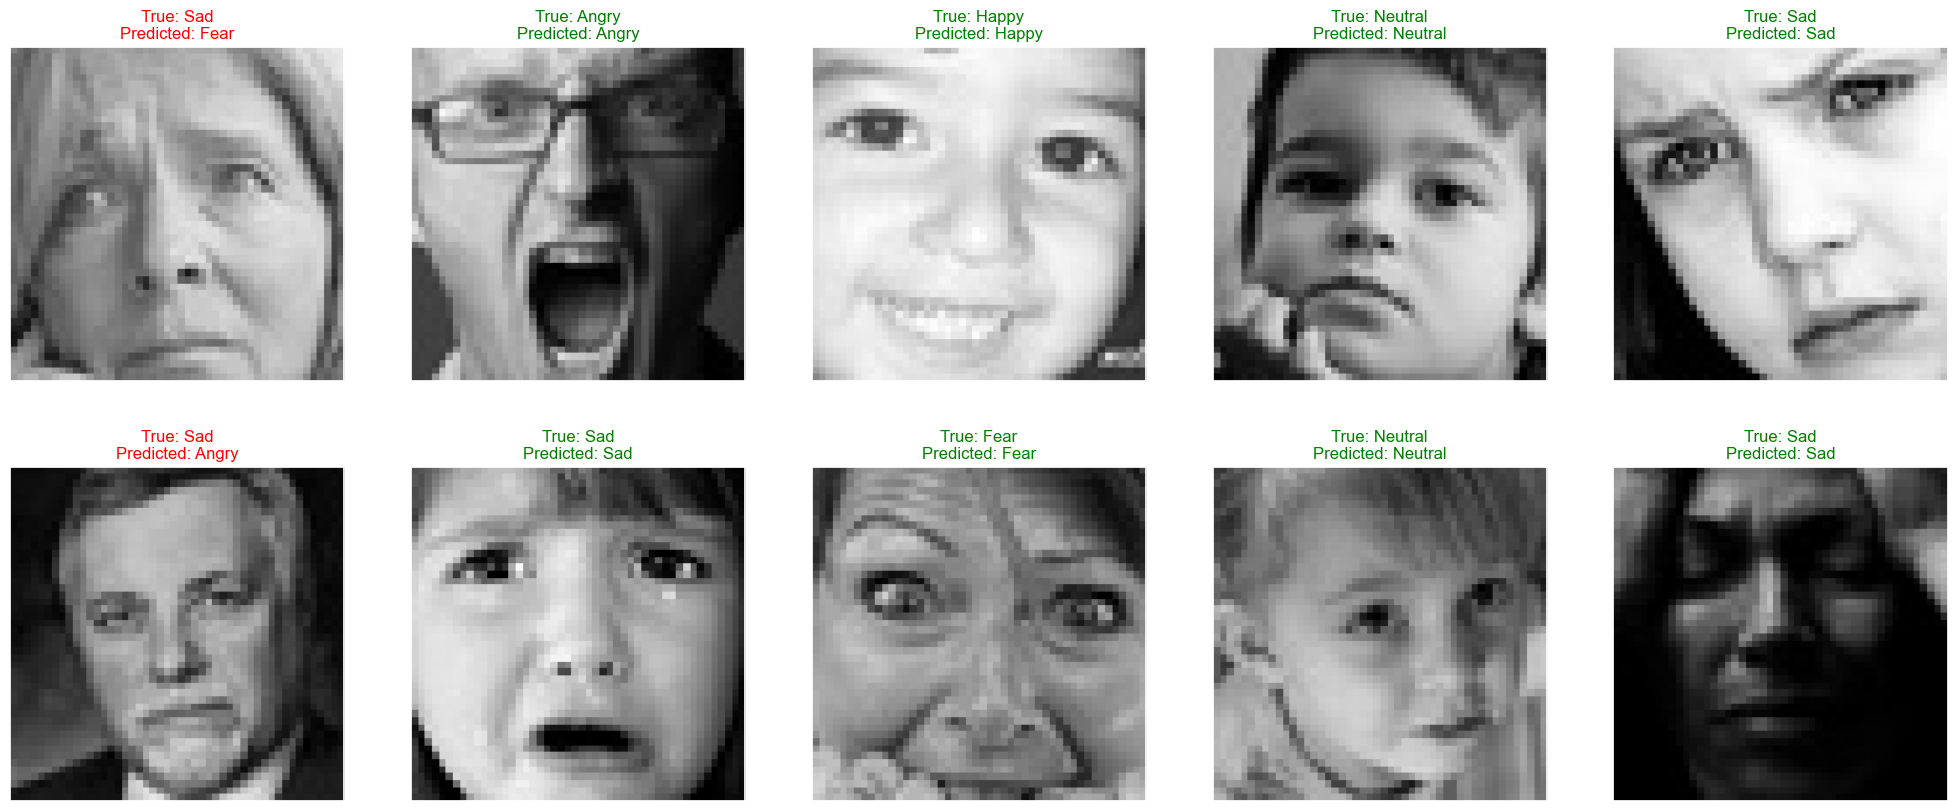

<Figure size 640x480 with 0 Axes>

In [41]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    # Resize the image to match the input shape of the CNN_Model
    resized_img = tf.image.resize(Random_Img, (48, 48))

    Model_Prediction = np.argmax(CNN_Model.predict( tf.expand_dims(resized_img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

**ResNet50V2 Predictions**

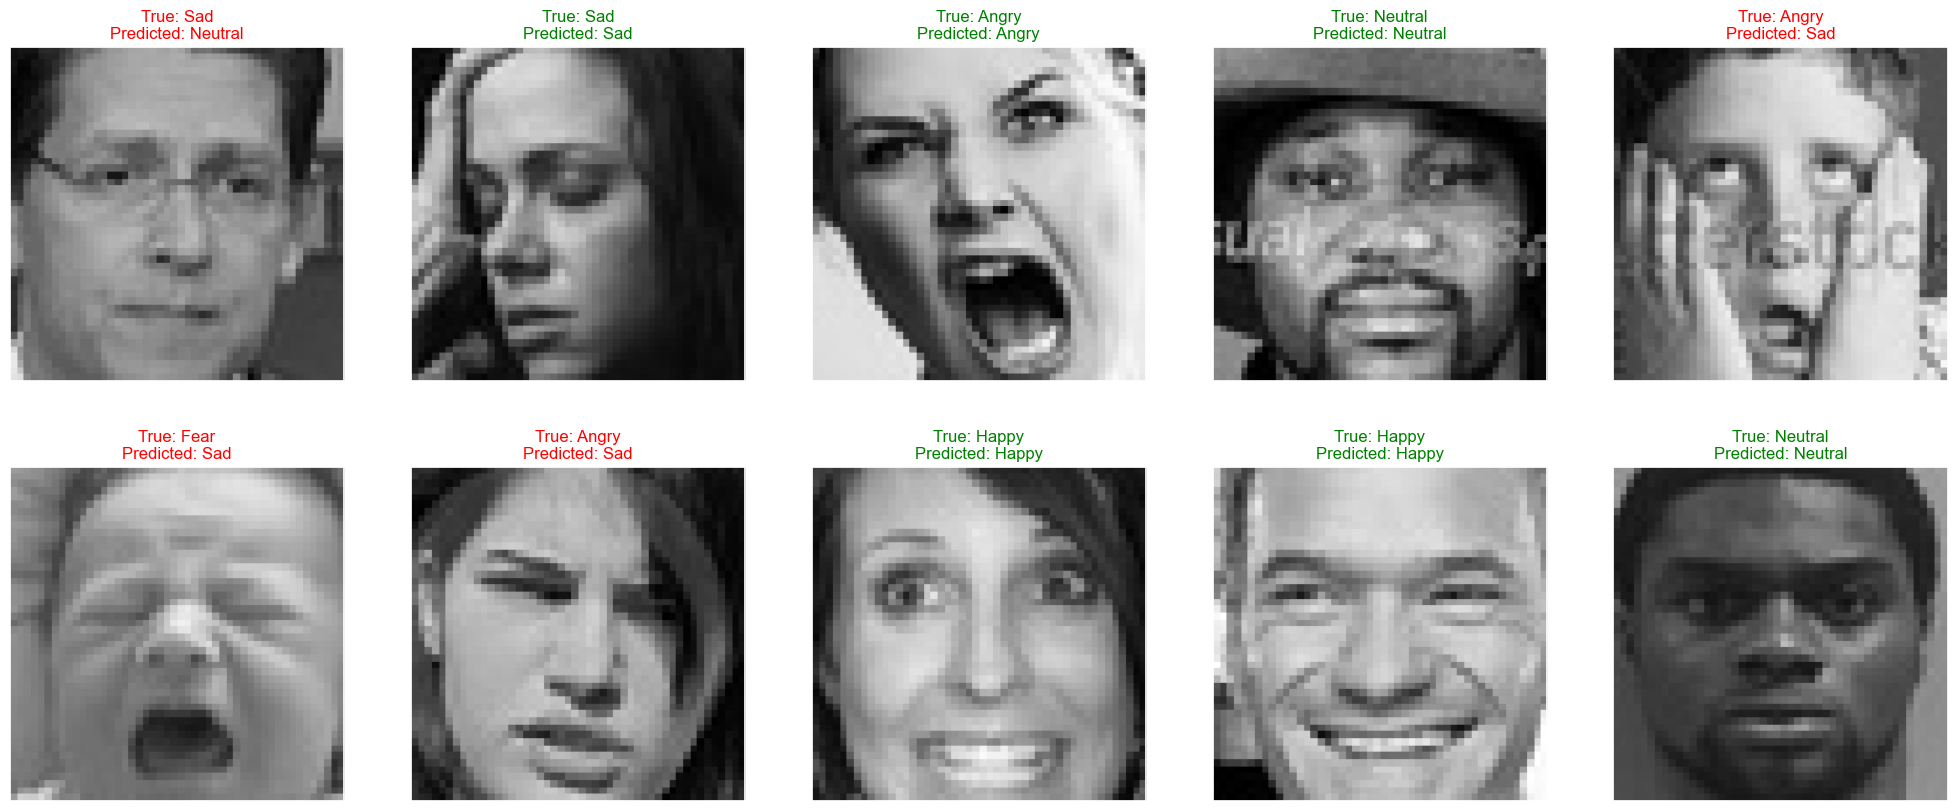

<Figure size 640x480 with 0 Axes>

In [42]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

## **Music Player**

In [44]:
Music_Player = pd.read_csv("/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/data_moods.csv")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [45]:
Music_Player["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [46]:
Music_Player["popularity"].value_counts()

popularity
0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [47]:
Play = Music_Player[Music_Player['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [48]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):

    if( pred_class=='Disgust' ):

        Play = Music_Player[Music_Player['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = Music_Player[Music_Player['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = Music_Player[Music_Player['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = Music_Player[Music_Player['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

## **Predicting New Images**

**Downloading OpenCV haarcascade frontalface Detection**

In [5]:
import cv2
	
faceCascade = cv2.CascadeClassifier("/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/haarcascade_frontalface_default.xml")    

In [6]:
def load_and_prep_image(filename, img_shape = 224):

    img = cv2.imread(filename)

    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    
    for x,y,w,h in faces:
        
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    RGBImg= cv2.resize(RGBImg,(img_shape,img_shape))

    RGBImg = RGBImg/255.

    return RGBImg

In [7]:
def pred_and_plot(filename, class_names):

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    # Plot the image and predicted class
    #plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);
    
    Recommend_Songs(pred_class)

In [16]:
from tensorflow.keras.applications import ResNet50V2

ResNet50V2_Model = ResNet50V2(weights='imagenet')


/Users/jeesoojhun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
print(ResNet50V2_Model)


<Functional name=resnet50v2, built=True>


No Faces Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


IndexError: list index out of range

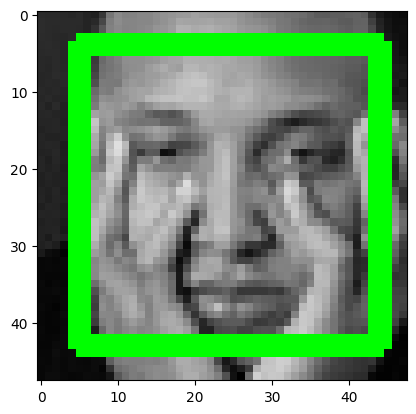

In [23]:
import matplotlib.pyplot as plt

pred_and_plot("/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/archive/test/sad/PrivateTest_528072.jpg", Emotion_Classes) # with CNN

No Faces Detected
Image shape: (224, 224, 3)
Image type: <class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predictions: [[2.36139404e-05 1.22253305e-05 6.26908877e-06 2.50500034e-06
  5.75145714e-06 7.64956349e-06 1.13464364e-06 5.83126939e-06
  4.05112314e-06 8.11553582e-06 1.28960937e-05 4.91831361e-06
  7.91805724e-06 7.40023870e-06 8.86353337e-06 5.02962621e-06
  1.08361621e-06 8.31565558e-06 2.40725990e-06 3.09619600e-06
  1.63033874e-05 1.84073997e-05 9.43011764e-06 3.74677279e-06
  5.09169768e-05 3.39326243e-06 4.83900612e-06 1.74344750e-05
  1.92604766e-05 1.03719030e-05 1.41767787e-05 5.93092727e-06
  1.63720215e-05 1.04668925e-06 4.34660615e-06 7.57692214e-06
  7.14264570e-06 6.69878227e-06 1.39371023e-05 2.72162697e-06
  6.18291187e-06 1.14003169e-05 6.55131635e-06 2.29723937e-05
  7.30617285e-06 5.45636431e-06 1.63822745e-06 5.85432144e-06
  4.66054644e-06 2.81541088e-06 1.16260653e-05 8.05069503e-05
  1.02829181e-05 7.06415858e-06 1.19488195e-05 1.64194682e-06

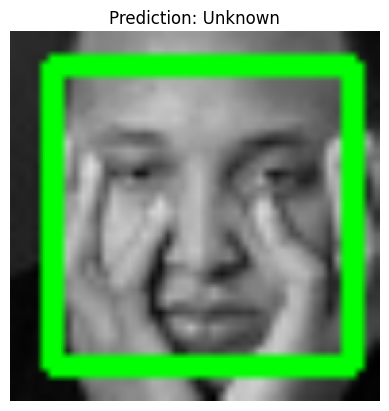

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def pred_and_plot(filename, class_names):
    """
    Predicts the class of an image and plots it with the prediction.
    
    Args:
    - filename: Path to the image file.
    - class_names: List of class names corresponding to the model's output.
    """
    # Load and preprocess the image
    img = load_and_prep_image(filename)

    # Debugging: Check the image's properties
    print("Image shape:", img.shape)
    print("Image type:", type(img))

    # Make a prediction (add a batch dimension to the image)
    pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    # Debugging: Print predictions and class information
    print("Predictions:", pred)
    print("Predicted index:", pred.argmax())
    print("Class names:", class_names)

    # Validate prediction index
    if pred.argmax() >= len(class_names):
        print("Warning: Predicted index is out of range for class names.")
        pred_class = "Unknown"
    else:
        pred_class = class_names[pred.argmax()]

    # Plot the image and predicted class
    plt.imshow(img)  # Ensure img is correctly formatted
    plt.title(f"Prediction: {pred_class}")
    plt.axis("off")  # Turn off axis display
    plt.show()

# Call the function
pred_and_plot(
    "/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/archive/test/sad/PrivateTest_528072.jpg",
    Emotion_Classes
)


In [29]:
# Downloading Image to Test On
!curl "https://pbs.twimg.com/media/EEY3RFFWwAAc-qm.jpg" -o sad.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36922  100 36922    0     0   231k      0 --:--:-- --:--:-- --:--:--  232k


Image shape: (224, 224, 3)
Image type: <class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predictions: [[4.21440788e-03 3.25840774e-05 5.44425311e-05 2.29676480e-05
  1.96606397e-05 4.56372582e-05 3.03413326e-05 6.20559877e-05
  3.92447218e-05 1.86718007e-05 8.94924306e-05 1.85579884e-05
  1.41823939e-05 3.95902607e-05 3.94605522e-05 3.10258038e-05
  1.04508026e-05 1.12066864e-05 1.51708909e-05 5.88080820e-06
  6.48021087e-05 7.89893675e-05 4.40568801e-05 9.76045885e-06
  1.64900048e-05 1.47594292e-05 1.28305537e-05 4.21070181e-05
  1.25166960e-04 5.87304312e-05 4.46030790e-05 1.30059734e-05
  3.66649729e-05 1.59076772e-05 4.26706938e-05 1.87860933e-05
  2.12750110e-05 1.61168500e-05 3.93865994e-05 5.51506164e-05
  1.37793595e-05 1.06196312e-04 2.04106545e-05 6.12501244e-05
  2.63153670e-05 4.61517520e-05 9.53418476e-06 3.66366985e-05
  6.05414498e-05 2.56260992e-05 6.90556626e-05 3.06808979e-05
  7.84154472e-05 4.76147688e-05 2.84332964e-05 1.10061765e-05
  3.39972758e-05 1

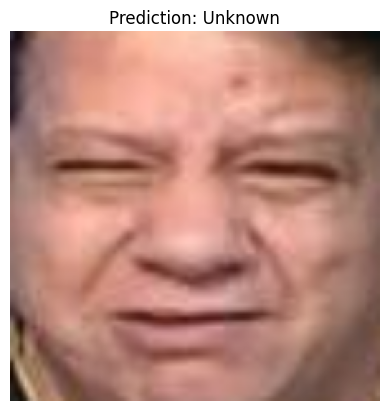

In [40]:
pred_and_plot("/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/sad.jpg", Emotion_Classes) # with CNN

Image shape: (224, 224, 3)
Image type: <class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions: [[2.92037148e-04 1.41703669e-04 6.43503663e-05 3.20877443e-05
  6.84705956e-05 1.14703696e-04 1.97502275e-04 7.33610577e-05
  1.08311840e-04 8.78538776e-05 4.58778028e-04 5.16195214e-05
  3.71306596e-05 2.12274623e-04 6.81924066e-05 2.21455601e-04
  1.47299463e-04 6.53515817e-05 1.06724598e-04 2.98262639e-05
  1.18433018e-04 1.56575014e-04 1.50877080e-04 4.42474629e-05
  7.40668911e-05 1.45765152e-04 1.16808958e-04 3.54665157e-04
  4.76625049e-04 2.94445985e-04 3.29501840e-04 3.24154171e-05
  1.29578533e-04 1.04110986e-04 7.16121576e-05 5.83292785e-05
  9.70571564e-05 6.83189137e-05 7.52361084e-05 2.69828917e-04
  5.89036026e-05 1.55478221e-04 2.06300349e-04 2.31472499e-04
  7.65223158e-05 9.16987046e-05 1.95291912e-04 4.24080463e-05
  3.33195669e-04 4.71922285e-05 6.51986047e-04 1.08989909e-04
  1.78208313e-04 1.15100425e-04 5.16875443e-05 9.70122710e-05
  1.40994132e-04 1

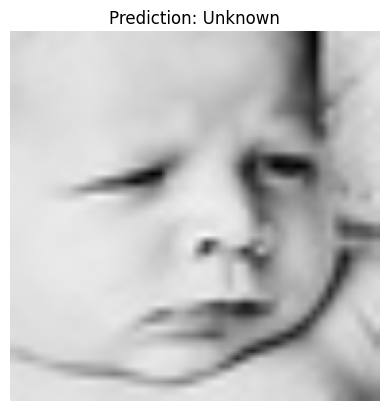

In [41]:
pred_and_plot("/Users/jeesoojhun/Library/Mobile Documents/com~apple~CloudDocs/Documents/Flatiron/Capstone/mood-detection-music-recommendation/archive/test/angry/PrivateTest_88305.jpg", Emotion_Classes) # with ResNet50V2

In [42]:
# Downloading Image to Test On
!curl "https://pbs.twimg.com/profile_images/758370732413947904/xYB5Q3FY_400x400.jpg" -O happy.jpg 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (6) Could not resolve host: happy.jpg


Image shape: (224, 224, 3)
Image type: <class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predictions: [[4.21440788e-03 3.25840774e-05 5.44425311e-05 2.29676480e-05
  1.96606397e-05 4.56372582e-05 3.03413326e-05 6.20559877e-05
  3.92447218e-05 1.86718007e-05 8.94924306e-05 1.85579884e-05
  1.41823939e-05 3.95902607e-05 3.94605522e-05 3.10258038e-05
  1.04508026e-05 1.12066864e-05 1.51708909e-05 5.88080820e-06
  6.48021087e-05 7.89893675e-05 4.40568801e-05 9.76045885e-06
  1.64900048e-05 1.47594292e-05 1.28305537e-05 4.21070181e-05
  1.25166960e-04 5.87304312e-05 4.46030790e-05 1.30059734e-05
  3.66649729e-05 1.59076772e-05 4.26706938e-05 1.87860933e-05
  2.12750110e-05 1.61168500e-05 3.93865994e-05 5.51506164e-05
  1.37793595e-05 1.06196312e-04 2.04106545e-05 6.12501244e-05
  2.63153670e-05 4.61517520e-05 9.53418476e-06 3.66366985e-05
  6.05414498e-05 2.56260992e-05 6.90556626e-05 3.06808979e-05
  7.84154472e-05 4.76147688e-05 2.84332964e-05 1.10061765e-05
  3.39972758e-05 

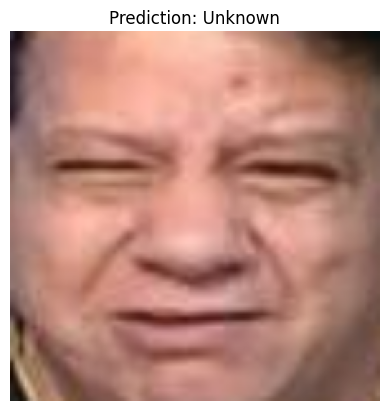

In [43]:
pred_and_plot("./sad.jpg", Emotion_Classes) # with ResNet50V2

In [45]:
# Example of defining or loading a model
from tensorflow.keras.models import Sequential

CNN_Model = Sequential()  # Define your model
# Add layers to the model, train, or load a pre-trained model
CNN_Model.save("CNN_Model.h5")  # Save the model


In [46]:
CNN_Model.save("CNN_Model.h5")

ResNet50V2_Model.save("ResNet50V2_Model.h5")